In [1]:
# # return suggested tickers from search

# import requests
# import json
# import pandas as pd

# key = "3SK9BB22RHSIBTQ3"

# keyword = "apple" # what user types in search bar

# url = f'https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords={keyword}&apikey={key}'
# r = requests.get(url)
# data = r.json()

# print(data)

In [2]:
# print json data

def print_json(data, indent=0):
    if isinstance(data, dict):
        for key, value in data.items():
            print(" " * indent + str(key) + ":")
            print_json(value, indent + 4)
    elif isinstance(data, list):
        for item in data:
            print_json(item, indent + 4)
    else:
        print(" " * indent + str(data))

In [3]:
# return recent financial statement information

symbol = "IBM"

# Income statement

# url = f'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={symbol}&apikey={key}'
# r = requests.get(url)
# data = r.json()


# print(data)

# print("JSON dictionary keys: ")
# for key in data:
#   print(key)
# print("\n")

# # print_json(data)

# annual_reports = data["annualReports"]
# df = pd.DataFrame(annual_reports)
# list(df.columns)




In [4]:
# Not using API:

import pandas as pd
import json

# import income statement data

income_statement_path = "./data/income_statement.json"
with open(income_statement_path, 'r') as file:
  IS_data = json.load(file)

IS_annualReports = IS_data["annualReports"]
IS_quarterlyReports = IS_data["quarterlyReports"]

IS_AR_df = pd.json_normalize(IS_annualReports)
IS_AR_df = IS_AR_df.iloc[::-1].reset_index(drop=True)

IS_QR_df = pd.json_normalize(IS_quarterlyReports)
IS_QR_df = IS_QR_df.iloc[::-1].reset_index(drop=True)

# import balance sheet data

balance_sheet_path = "./data/balance_sheet.json"
with open(balance_sheet_path, 'r') as file:
  BS_data = json.load(file)

BS_annualReports = BS_data["annualReports"]
BS_quarterlyReports = BS_data["quarterlyReports"]

BS_AR_df = pd.json_normalize(BS_annualReports)
BS_AR_df = BS_AR_df.iloc[::-1].reset_index(drop=True)

BS_QR_df = pd.json_normalize(BS_quarterlyReports)
BS_QR_df = BS_QR_df.iloc[::-1].reset_index(drop=True)

# import cash flow statement

cash_flow_path = "./data/cash_flow.json"
with open(cash_flow_path, 'r') as file:
  CF_data = json.load(file)

CF_annualReports = CF_data["annualReports"]
CF_quarterlyReports = CF_data["quarterlyReports"]

CF_AR_df = pd.json_normalize(CF_annualReports)
CF_AR_df = CF_AR_df.iloc[::-1].reset_index(drop=True)

CF_QR_df = pd.json_normalize(CF_quarterlyReports)
CF_QR_df = CF_QR_df.iloc[::-1].reset_index(drop=True)

dfs = [IS_AR_df, IS_QR_df, BS_AR_df, BS_QR_df, CF_AR_df, CF_QR_df]

In [5]:
CF_QR_df.isnull().sum()

fiscalDateEnding                                             0
reportedCurrency                                             0
operatingCashflow                                            0
paymentsForOperatingActivities                               0
proceedsFromOperatingActivities                              0
changeInOperatingLiabilities                                 0
changeInOperatingAssets                                      0
depreciationDepletionAndAmortization                         0
capitalExpenditures                                          0
changeInReceivables                                          0
changeInInventory                                            0
profitLoss                                                   0
cashflowFromInvestment                                       0
cashflowFromFinancing                                        0
proceedsFromRepaymentsOfShortTermDebt                        0
paymentsForRepurchaseOfCommonStock                     

In [25]:
IS_AR_df.isnull().sum()

fiscalDateEnding                      0
reportedCurrency                      0
grossProfit                           0
totalRevenue                          0
costOfRevenue                         0
costofGoodsAndServicesSold            0
operatingIncome                       0
sellingGeneralAndAdministrative       0
researchAndDevelopment                0
operatingExpenses                     0
investmentIncomeNet                  15
netInterestIncome                     0
interestIncome                        7
interestExpense                       0
nonInterestIncome                     4
otherNonOperatingIncome               0
depreciation                          0
depreciationAndAmortization           0
incomeBeforeTax                       0
incomeTaxExpense                      0
interestAndDebtExpense                0
netIncomeFromContinuingOperations     0
comprehensiveIncomeNetOfTax           0
ebit                                  0
ebitda                                0


In [26]:
BS_AR_df.isnull().sum()



fiscalDateEnding                           0
reportedCurrency                           0
totalAssets                                0
totalCurrentAssets                         0
cashAndCashEquivalentsAtCarryingValue      0
cashAndShortTermInvestments                0
inventory                                  0
currentNetReceivables                      1
totalNonCurrentAssets                      0
propertyPlantEquipment                     0
accumulatedDepreciationAmortizationPPE     1
intangibleAssets                           0
intangibleAssetsExcludingGoodwill          0
goodwill                                   0
investments                                1
longTermInvestments                        1
shortTermInvestments                       0
otherCurrentAssets                         0
otherNonCurrentAssets                      8
totalLiabilities                           0
totalCurrentLiabilities                    0
currentAccountsPayable                     0
deferredRe

In [14]:
# function for converting numerical columns to integers

def cols_2_int(df, cols_not_int):
  columns_2_integers = [col for col in df.columns if col not in cols_not_int]

  df[columns_2_integers] = df[columns_2_integers].apply(pd.to_numeric, errors='coerce').astype('Int64')

  return df



for df in dfs:
  df = cols_2_int(df, ['fiscalDateEnding', 'reportedCurrency'])

  # date column to proper data type
  df['fiscalDateEnding'] = pd.to_datetime(df['fiscalDateEnding'])



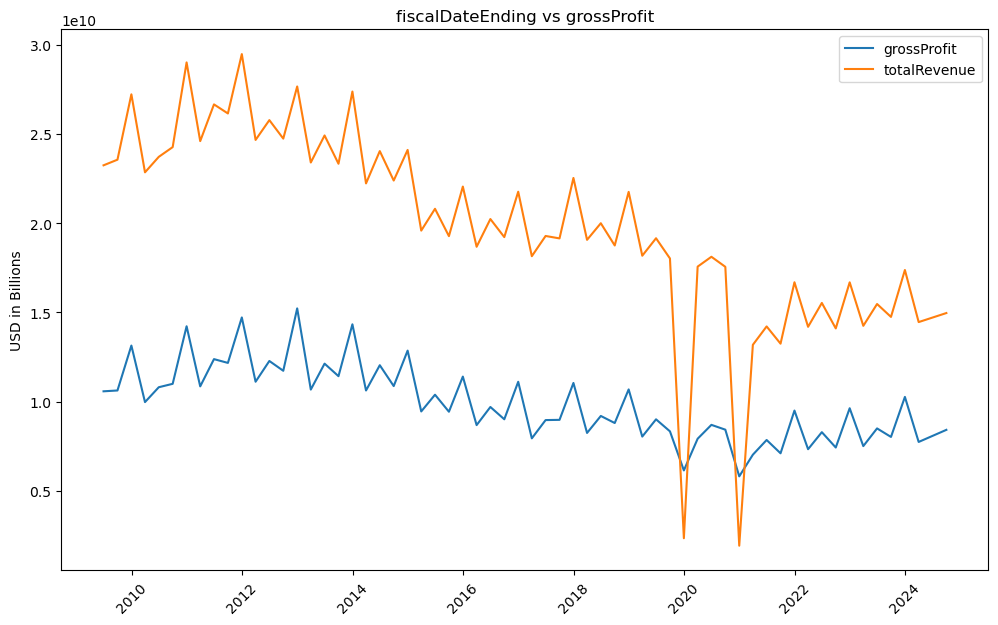

In [ ]:

# Plot data vs date

import matplotlib.pyplot as plt

x = 'fiscalDateEnding'
y = 'grossProfit'
y2 = 'totalRevenue'

fig, ax = plt.subplots(figsize=(10,6)) # figure, axes
fig.tight_layout()
ax.plot(IS_QR_df[x], IS_QR_df[y], label=y)
ax.plot(IS_QR_df[x], IS_QR_df[y2], label=y2)
ax.set_ylabel("USD in Billions")
ax.set_title(f"{x} vs {y}")
ax.legend()
ax.tick_params(axis='x', rotation=45)
plt.show()

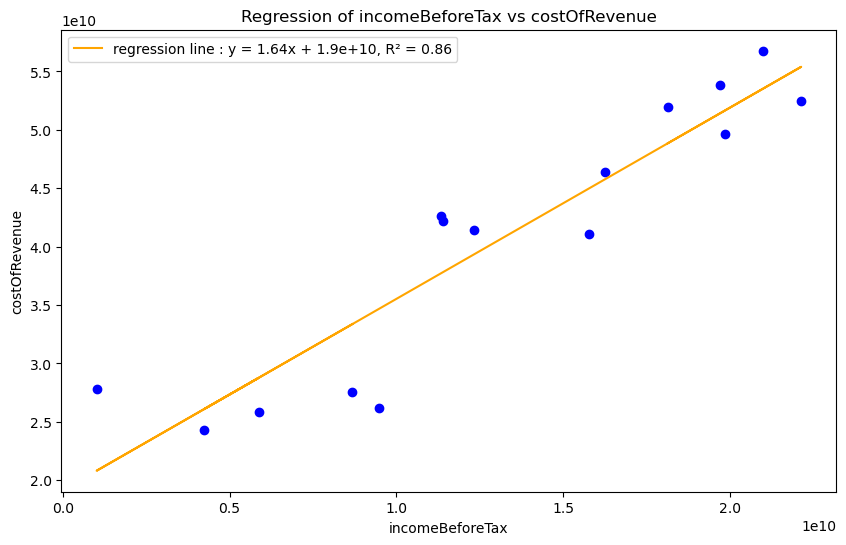

In [15]:
# function to plot simple linear regression for two columns

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

x = 'incomeBeforeTax'
y = 'costOfRevenue'
df = IS_AR_df
def linear_regression_plot(x_name, y_name, df):

  x = np.array(df[x_name]).reshape(-1,1)
  y = np.array(df[y_name]).reshape(-1,1)

  fig, ax = plt.subplots(figsize=(10,6))
  ax.scatter(x, y, color='blue')


  regressor = LinearRegression().fit(x, y)

  # regression line values
  coef = np.format_float_positional(regressor.coef_[0], precision=2)
  intercept = np.format_float_scientific(np.array(regressor.intercept_), precision=1, trim='.')
  r_sq_value = np.format_float_positional(regressor.score(x,y),precision=2)

  # add regression equation
  eq = f'y = {coef}x + {intercept}'
  r_sq = f'R² = {r_sq_value}'
  eq = eq + ', ' + r_sq

  y_pred = regressor.predict(x) # evaluates on test data
  ax.plot(x, y_pred, color='orange', label=f"regression line : {eq}")
  ax.set_title(f'Regression of {x_name} vs {y_name}')
  ax.set_xlabel(f'{x_name}')
  ax.set_ylabel(f'{y_name}')
  ax.legend()
  plt.show()

linear_regression_plot(x, y, df)

In [16]:
# Functions to calculate some ratios

# Activity Ratios: how efficienty does the company utilize assets (combine IS with BS)
def inventory_turnover(IS_df, BS_df):
  cogs = IS_df['costofGoodsAndServicesSold']
  avg_inventory = BS_df['inventory'] # not average inventory
  return cogs / avg_inventory

def receivables_turnover(IS_df,BS_df):
  revenue = IS_df['totalRevenue']
  avg_receivables = BS_df['currentNetReceivables']
  return revenue / avg_receivables

def fixed_asset_turnover(IS_df, BS_df):
  revenue = IS_df['totalRevenue']
  avg_net_fixed_assets = BS_df['propertyPlantEquipment']
  return revenue / avg_net_fixed_assets

def total_asset_turnover(IS_df, BS_df):
  revenue = IS_df['totalRevenue']
  avg_total_assets = BS_df['totalAssets']
  return revenue / avg_total_assets

# Profitability Ratios
def gross_profit_margin(IS_df):
  revenue = IS_df['totalRevenue']
  cogs = IS_df['costofGoodsAndServicesSold']
  return (revenue - cogs) / revenue * 100

def operating_profit_margin(IS_df):
  op_income = IS_df['operatingIncome']
  revenue = IS_df['totalRevenue']
  return op_income / revenue * 100

def net_profit_margin(IS_df):
  net_income = IS_df['netIncome']
  revenue = IS_df['totalRevenue']
  return net_income / revenue * 100

# def return_on_assets():

# def return_on_equity():

# # Liquidity Ratios
def current_ratio(BS_df):
  current_assets = BS_df['totalCurrentAssets']
  current_liabilities = BS_df['totalCurrentLiabilities']
  return current_assets / current_liabilities

def quick_ratio(BS_df):
  cash = BS_df['cashAndCashEquivalentsAtCarryingValue']
  short_term_marketable_investments = BS_df['shortTermInvestments']
  receivables = BS_df['currentNetReceivables']
  current_liabilities = BS_df['totalCurrentLiabilities']
  return (cash + short_term_marketable_investments + receivables) / current_liabilities

def cash_ratio(BS_df):
  cash = BS_df['cashAndCashEquivalentsAtCarryingValue']
  short_term_marketable_investments = BS_df['shortTermInvestments']
  current_liabilities = BS_df['totalCurrentLiabilities']
  return (cash + short_term_marketable_investments) / current_liabilities



# Solvency Ratios
def debt_to_assets(BS_df):
  total_debt = BS_df['longTermDebt'] + BS_df['shortTermDebt']
  total_assets = BS_df['totalAssets']
  return total_debt / total_assets

def debt_to_capital(BS_df):
  total_debt = BS_df['longTermDebt'] + BS_df['shortTermDebt']
  total_shareholder_equity = BS_df['totalShareholderEquity']
  return total_debt / (total_debt + total_shareholder_equity)

def debt_to_equity(BS_df):
  total_debt = BS_df['longTermDebt'] + BS_df['shortTermDebt']
  total_shareholder_equity = BS_df['totalShareholderEquity']
  return total_debt / total_shareholder_equity

def financial_leverage_ratio(BS_df):
  total_assets = BS_df['totalAssets']
  total_equity = BS_df['totalShareholderEquity']
  return total_assets / total_equity

# Market Value Ratios
def earnings_per_share(IS_df, BS_df):
  net_income = IS_df['netIncome']
  number_of_outstanding_shares = BS_df['commonStockSharesOutstanding']

  return net_income / number_of_outstanding_shares

# def price_to_earnings():

  

earnings_per_share(IS_QR_df, BS_QR_df)

0     2.339944
1     2.435033
2     3.650832
3     1.998924
4     2.647427
        ...   
56    1.739836
57    1.866784
58    3.593389
59    1.749891
60   -0.357298
Length: 61, dtype: Float64

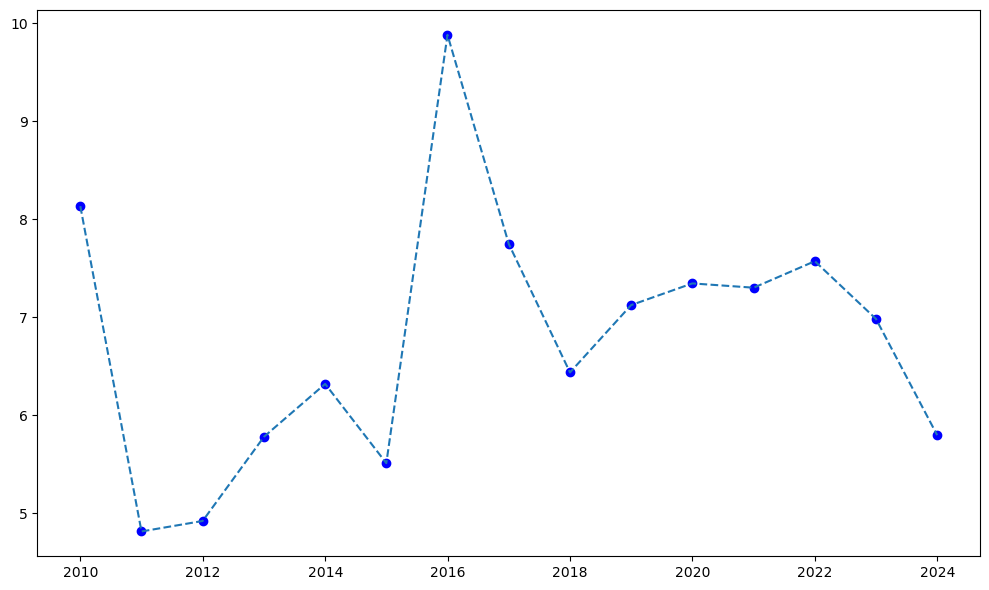

In [58]:
# plotting ratios

def smaller_size(arr1, arr2):
  return min(len(arr1), len(arr2))

y = financial_leverage_ratio(BS_AR_df)
x = IS_AR_df['fiscalDateEnding']

n = smaller_size(x, y)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x.iloc[:n], y.iloc[:n], color='blue')
ax.plot(x.iloc[:n], y.iloc[:n], '--')
plt.tight_layout()
plt.show()

In [86]:
# DCF

# get last five years of free cash flow data (FCF = operating cash flow - capital expenditures)

fcf = np.array(CF_AR_df['operatingCashflow'][:5] - CF_AR_df['capitalExpenditures'][:5])

# historical growth rate from fcf using compound annual growth rate (CAGR)

n = np.size(fcf)
if n > 1:
  cagr = (fcf[-1] / fcf[0]) ** (1 / (n-1)) - 1
else: cagr = 0.05

# Projection period
projected_years = 5
future_fcf = [fcf[-1] * (1 + cagr) ** i for i in range(1, projected_years + 1)]

# Discount rate (WACC)
wacc = 0.08

# Discount future FCFs back to PV
discounted_fcf = [future_fcf[i] / (1 + wacc) ** (i + 1) for i in range (projected_years)]

# Terminal Value (TV) - perpetuity growth model
terminal_growth_rate = 0.03
terminal_value = (future_fcf[-1] * (1 + terminal_growth_rate)) / (wacc - terminal_growth_rate)

# Discount Terminal Value
discounted_terminal_value = terminal_value / (1 + wacc) ** projected_years

# Enterprise Value
enterprise_value = sum(discounted_fcf) + discounted_terminal_value

# Equity Value = Enterprise Value - Net Debt
net_debt = BS_AR_df['longTermDebt'][0] + BS_AR_df['shortTermDebt'][0]
equity_value = enterprise_value - net_debt

intrinsic_share_price = equity_value / BS_AR_df['commonStockSharesOutstanding'][0]

print(f"Intrinsic share price: {intrinsic_share_price}")

current_price = 250

if intrinsic_share_price > current_price :
  print("Buy!")
else: print("Don't buy!")

Intrinsic share price: 110.76051201609786
Don't buy!
